<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Prac2Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funcionamiento de las LIBRERIAS mlxtend o apyori

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from mlxtend.frequent_patterns import apriori, association_rules

#pip install mlxtend  

In [107]:
data = pd.read_csv('BlackFriday.csv', encoding='UTF-8')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [108]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [109]:
data.isnull().values.any() 

True

Vemos en que columnas hay NA's

In [110]:
data.isna().sum()  

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Los valores de NaN aparecen en Product Category. Vamos a comprobar el rango de valores para estas dos categorias.

In [111]:
print(data['Product_Category_1'].min(), data['Product_Category_1'].max(), data['Product_Category_1'].mean())

1 18 5.276542279718663


In [112]:
print(data['Product_Category_2'].min(), data['Product_Category_2'].max(), data['Product_Category_2'].mean())


2.0 18.0 9.849586059346997


In [113]:
print(data['Product_Category_3'].min(), data['Product_Category_3'].max(), data['Product_Category_3'].mean())

3.0 18.0 12.669453946534905


Observamos que las dos columnas tienen valores minimos de 2 y 3 respectivamente. Por tanto los valores NaN se pueden igualar a 0 para que asi se contemplen en el analisis de los datos pero no influyan al estudio. 

In [114]:
data.fillna(0, inplace=True)

Vemos si hay algún dato duplicado

In [115]:
if any(data.duplicated()):
  print("Hay datos duplicados")
else:
  print("No hay datos duplicados")

No hay datos duplicados


- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

In [116]:
data.loc[(data['Gender'] == 'M'),'Male'] = True
data.loc[(data['Gender'] == 'F'),'Male'] = False
data.loc[(data['Gender'] == 'F'),'Female'] = True
data.loc[(data['Gender'] == 'M'),'Female'] = False

data.loc[(data['Age'] != '0-17'), 'Menores'] = False
data.loc[(data['Age'] == '0-17'), 'Menores'] = True
data.loc[(data['Age'] != '18-25'), 'Uni'] = False
data.loc[(data['Age'] == '18-25'), 'Uni'] = True
data.loc[(data['Age'] != '26-35'), 'PostUni'] = False
data.loc[(data['Age'] == '26-35'), 'PostUni'] = True
data.loc[(data['Age'] != '36-45'), 'Medio'] = False
data.loc[(data['Age'] == '36-45'), 'Medio'] = True
data.loc[(data['Age'] != '46-50'), 'Mayor'] = False
data.loc[(data['Age'] == '46-50'), 'Mayor'] = True
data.loc[(data['Age'] != '51-55'), 'PreJubi'] = False
data.loc[(data['Age'] == '51-55'), 'PreJubi'] = True
data.loc[(data['Age'] != '55+'), 'Jubi'] = False
data.loc[(data['Age'] == '55+'), 'Jubi'] = True

mediaCat1=data['Product_Category_1'].mean()
mediaCat2=data['Product_Category_2'].mean()
mediaCat3=data['Product_Category_3'].mean()

data.loc[(data['Product_Category_1'] > mediaCat1), 'Cat1'] = True
data.loc[(data['Product_Category_1'] <= mediaCat1), 'Cat1'] = False
data.loc[(data['Product_Category_2'] > mediaCat2), 'Cat2'] = True
data.loc[(data['Product_Category_2'] <= mediaCat2), 'Cat2'] = False
data.loc[(data['Product_Category_3'] > mediaCat3), 'Cat3'] = True
data.loc[(data['Product_Category_3'] <= mediaCat3), 'Cat3'] = False

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Menores,Uni,PostUni,Medio,Mayor,PreJubi,Jubi,Cat1,Cat2,Cat3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,...,False,False,False,False,True,False,False,False,True,False
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,...,False,False,True,False,False,False,False,False,False,False
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,...,False,False,False,True,False,False,False,False,True,False
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,...,False,False,False,True,False,False,False,False,True,False
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,...,False,False,True,False,False,False,False,False,False,True


Colocamos los datos de la forma indicada para poder calcular las frecuencias de estos más adelante

In [117]:
data1 = pd.DataFrame(data,columns=['User_ID','Male','Female','Menores','Uni','PostUni','Medio','Mayor','PreJubi','Jubi','Cat1','Cat2','Cat3']).set_index('User_ID')
data1.head()

,Male,Female,Menores,Uni,PostUni,Medio,Mayor,PreJubi,Jubi,Cat1,Cat2,Cat3
User_ID,,,,,,,,,,,,
1000004,True,False,False,False,False,False,True,False,False,False,True,False
1000009,True,False,False,False,True,False,False,False,False,False,False,False
1000010,False,True,False,False,False,True,False,False,False,False,True,False
1000010,False,True,False,False,False,True,False,False,False,False,True,False
1000011,False,True,False,False,True,False,False,False,False,False,False,True


# 1) Itemsets frecuentes para k=1

Para hallar esto necesitamos calcular el soporte y las frecuencias de estos itemsets

IR VARIANDO EL MIN_SUPPORT HASTA QUE SALE UN NÚMERO DE REGLAS RAZONABLE

In [118]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data1, min_support=0.06, use_colnames=True)
frequent_itemsets_k1 =frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
frequent_itemsets_k1_sort = frequent_itemsets_k1.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k1_sort.support*len(data1)
frequent_itemsets_k1_sort['frecuencia'] =frequent
frequent_itemsets_k1_sort

,support,itemsets,frecuencia
0,0.752452,(Male),175772.0
8,0.469471,(Cat2),109668.0
3,0.39995,(PostUni),93428.0
7,0.36168,(Cat1),84488.0
9,0.302964,(Cat3),70772.0
1,0.247548,(Female),57827.0
4,0.199962,(Medio),46711.0
2,0.18105,(Uni),42293.0
5,0.083806,(Mayor),19577.0
6,0.069705,(PreJubi),16283.0


COMPRUEBAMOS QUE LOS VALORES SON LOS CORRESTOS

SupportMale=len(Gender)/Male

In [119]:
SupportMale=sum(data.Male==True)/len(data.Gender)
print(SupportMale)

0.7524518512493632


# 2) Itemsets frecuentes para k≥2.

## a. Mostrar los itemset frecuentes candidatos y su soporte.

In [120]:
frequent_itemsets_k2 =frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
frequent_itemsets_k2_sort = frequent_itemsets_k2.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k2_sort.support*len(data1)
frequent_itemsets_k2_sort['frecuenciak2'] =frequent

frequent_itemsets_k2_sort.head()

,support,itemsets,frecuenciak2
15,0.35046,"(Male, Cat2)",81867.0
11,0.30715,"(PostUni, Male)",71750.0
14,0.265284,"(Male, Cat1)",61970.0
16,0.234539,"(Male, Cat3)",54788.0
23,0.186422,"(PostUni, Cat2)",43548.0


# 3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

In [121]:
frequent_itemsets_k3 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]
frequent_itemsets_k3_sort = frequent_itemsets_k3.sort_values(by=['support'], ascending=False)

frequent=frequent_itemsets_k3_sort.support*len(data1)
frequent_itemsets_k3_sort['frecuenciak3'] =frequent

frequent_itemsets_k3_sort.head()

,support,itemsets,frecuenciak3
31,0.141332,"(PostUni, Male, Cat2)",33015.0
34,0.136306,"(Male, Cat2, Cat1)",31841.0
30,0.105668,"(PostUni, Male, Cat1)",24684.0
35,0.100814,"(Male, Cat2, Cat3)",23550.0
32,0.096161,"(PostUni, Male, Cat3)",22463.0


In [123]:
#frequent_itemsets_k4 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 4)]
#frequent_itemsets_k4.head()

Paramos 

# 4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

In [124]:
rules = association_rules(frequent_itemsets, metric='confidence',  min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Uni),(Male),0.181050,0.752452,0.136362,0.753174,1.000960,0.000131,1.002927
1,(PostUni),(Male),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
2,(Medio),(Male),0.199962,0.752452,0.149915,0.749716,0.996365,-0.000547,0.989070
3,(Mayor),(Male),0.083806,0.752452,0.060064,0.716708,0.952497,-0.002996,0.873828
4,(Cat1),(Male),0.361680,0.752452,0.265284,0.733477,0.974783,-0.006863,0.928806


# 5) Listar todas las reglas que sean de alta confianza.

1- SEGÚN SU CONFIANZA

In [125]:
rules_sort = rules.sort_values(by=['confidence'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(PostUni, Cat3)",(Male),0.120792,0.752452,0.096161,0.796080,1.057982,0.005270,1.213950
6,(Cat3),(Male),0.302964,0.752452,0.234539,0.774148,1.028834,0.006573,1.096063
1,(PostUni),(Male),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
13,"(Cat2, Cat3)",(Male),0.132441,0.752452,0.100814,0.761200,1.011626,0.001159,1.036633
9,"(PostUni, Cat2)",(Male),0.186422,0.752452,0.141332,0.758129,1.007545,0.001058,1.023472


# 6) Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor. 


In [126]:
rules['antecedents']

0               (Uni)
1           (PostUni)
2             (Medio)
3             (Mayor)
4              (Cat1)
5              (Cat2)
6              (Cat3)
7         (Cat2, Uni)
8     (PostUni, Cat1)
9     (PostUni, Cat2)
10    (PostUni, Cat3)
11      (Cat2, Medio)
12       (Cat2, Cat1)
13       (Cat2, Cat3)
Name: antecedents, dtype: object

In [67]:
if any(rules['antecedents']=={'Medio'})>0:
  apariciones_antecedente= sum(rules['antecedents'] =={'Medio'})
  print("Número de veces que está: ", apariciones_antecedente)
else:
  print("NO esta")

Número de veces que está:  1


In [127]:
for i in range(len(rules)):
  if rules['antecedents'][i] == {'Medio'}:
    print(rules.iloc[i])

antecedents            (Medio)
consequents             (Male)
antecedent support    0.199962
consequent support    0.752452
support               0.149915
confidence            0.749716
lift                  0.996365
leverage             -0.000547
conviction             0.98907
Name: 2, dtype: object


## 6.2) Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

In [128]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Uni),(Male),0.181050,0.752452,0.136362,0.753174,1.000960,0.000131,1.002927
1,(PostUni),(Male),0.399950,0.752452,0.307150,0.767971,1.020625,0.006207,1.066885
2,(Medio),(Male),0.199962,0.752452,0.149915,0.749716,0.996365,-0.000547,0.989070
3,(Mayor),(Male),0.083806,0.752452,0.060064,0.716708,0.952497,-0.002996,0.873828
4,(Cat1),(Male),0.361680,0.752452,0.265284,0.733477,0.974783,-0.006863,0.928806


# 7) Representar gráficamente las reglas obtenidas


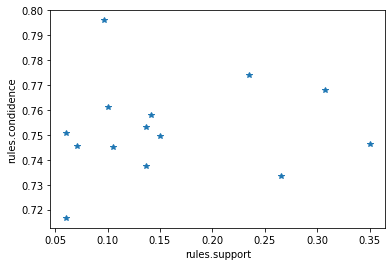

In [129]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.plot(rules.support, rules.confidence, '*')  

## 7.1) Obtener conclusiones a partir de estas

In [130]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

0    0.136362
1    0.307150
2    0.149915
3    0.060064
4    0.265284
Name: support, dtype: float64

2- SEGÚN SU LIFT

In [131]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.8)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
69,"(Male, Cat1)",(Cat2),0.265284,0.469471,0.136306,0.513813,1.094451,0.011763,1.091204
72,(Cat2),"(Male, Cat1)",0.469471,0.265284,0.136306,0.290340,1.094451,0.011763,1.035307
35,(Cat1),(Cat2),0.361680,0.469471,0.184778,0.510889,1.088223,0.014980,1.084680
34,(Cat2),(Cat1),0.469471,0.361680,0.184778,0.393588,1.088223,0.014980,1.052618
84,(Cat2),"(PostUni, Cat1)",0.469471,0.141829,0.071867,0.153080,1.079333,0.005282,1.013285


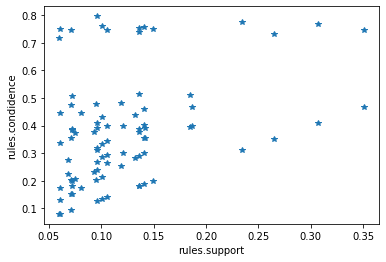

In [132]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.plot(rules.support, rules.confidence, '*')  

In [74]:
rules_maximales = rules [max(rules)]
rules_maximales.head()

0    0.136362
1    0.136362
2    0.307150
3    0.307150
4    0.149915
Name: support, dtype: float64

DECIR QUE REGLAS DESAPARECEN DEPENDIENDO DE LAS COMBINACIONES DE CONFIGURACIÓN Y CATEGORÍAS QUE TOMAMOS

EJ 1: HOMBRE POSTUNI TIPO PRODUCTO 2 + LIFT 

EJ 2: MUJER JUBI TIPO PRODUCTO 1 + CONFIANCE

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas
  que   
  te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   
un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold.  
Justifica los resultados. (1 punto)

In [133]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.4)
rules_sort = rules.sort_values(by=['lift'], ascending=False)
rules_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
69,"(Male, Cat1)",(Cat2),0.265284,0.469471,0.136306,0.513813,1.094451,0.011763,1.091204
72,(Cat2),"(Male, Cat1)",0.469471,0.265284,0.136306,0.290340,1.094451,0.011763,1.035307
35,(Cat1),(Cat2),0.361680,0.469471,0.184778,0.510889,1.088223,0.014980,1.084680
34,(Cat2),(Cat1),0.469471,0.361680,0.184778,0.393588,1.088223,0.014980,1.052618
84,(Cat2),"(PostUni, Cat1)",0.469471,0.141829,0.071867,0.153080,1.079333,0.005282,1.013285


In [134]:
any(rules.duplicated())

False

- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)

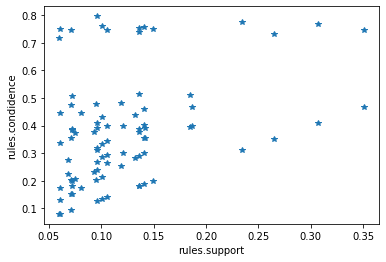

In [135]:
plt.xlabel('rules.support')
plt.ylabel('rules.condidence')
plt.plot(rules.support, rules.confidence, '*')  

#Se Pide:

A partir de lo anterior se pide:

- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
(1 punto)

- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

-   ¿Qué   tipo   reglas   desaparecen   según   la   configuración   y   categorías   ( género,   edad   y   tipo   de   producto)
consideradas? ¿Por qué? (1 punto)

2 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CONFIGURACIÓN:

1- SEGÚN SU CONFIANZA

CONFIZANZA= SOPORTE(1) / SOPORTE(1,2)

2- SEGÚN SU LIFT

LIFT = CONFIANZA / SOPORTE

3 TIPOS DE CLASIFICAR REGLAS SEGÚN SU CATEGORÍA:

1- GÉNERO 2- EDAD 3- TIPO DE PRODUCTO

-   Para   una   de   las   configuraciones,   interpreta   algunas   de   las   reglas   que   te   hayan   resultado   interesantes
obtenidas   usando   la   clase  association_rules  y   un   par   de   configuraciones   cambiando   la   variable  metric  y
min_threshold. Justifica los resultados. (1 punto)

- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar  de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos (1 punto)